# Visualize sensor data bias
- This script is used to compare three sensor to Super Site.

In [1]:
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
home_path = '/gws/nopw/j04/duicv/yuansun/'

In [2]:
sensor_list = ['MOD-PM-00454', 'MOD-PM-00459', 'MOD-PM-00461']
sensor_datapath = f'{home_path}manchester/sensor/analyse_variable/temperature/tem_rh_hourly/'
meta_data = pd.read_csv(f'{home_path}manchester/sensor/meta_data/meta_data_final_for_analyse.csv')
meta_data

,sn,start_time,end_time,lat,lon,TB notes,Still active,data_start_time,data_end_time,analyse_start_time,analyse_end_time
0,MOD-PM-00097,2021-01-12 05:20:00,2024-01-15 11:56:00,53.484020,-2.270676,NaN,No,2021-02-01 16:31:00,2024-01-15 11:56:00,2022-08-11 12:57:14,2024-01-15 11:56:00
1,MOD-PM-00342,2021-09-08 15:26:00,2024-06-07 20:36:00,53.504016,-2.217164,Delete data prioir to the 19th of April 2023,No,2021-09-08 20:59:00,2024-06-07 20:36:00,2023-04-19 12:27:34,2024-06-07 20:36:26
2,MOD-PM-00343,2021-09-08 15:28:00,2024-06-07 20:38:00,53.484843,-2.232818,NaN,No,2021-09-08 20:22:00,2024-06-07 20:38:00,2023-02-01 10:51:32,2024-06-07 20:38:02
3,MOD-PM-00348,2021-09-08 15:36:00,2024-06-07 20:38:00,53.467837,-2.257569,NaN,No,2021-09-08 20:27:00,2024-06-07 20:38:00,2022-07-13 12:27:27,2024-06-07 20:38:16
4,MOD-PM-00349,2021-09-08 15:38:00,2024-09-22 09:34:00,53.510109,-2.243550,TB location,Yes,2021-09-08 20:37:00,2024-09-13 15:42:00,2023-02-01 12:16:35,2024-08-31 23:59:59
5,MOD-00036,2021-12-05 10:59:00,2024-09-22 09:21:00,53.449677,-2.184382,Matthews Lane,Yes,2022-02-18 13:45:00,2024-09-13 15:56:00,2023-01-10 18:10:14,2024-08-31 23:59:59
6,MOD-00038,2021-12-05 11:09:00,2024-09-22 09:30:00,53.481630,-2.226486,NaN,Yes,2022-02-18 13:57:00,2024-09-13 15:42:00,2022-02-18 13:57:04,2024-08-31 23:59:59
7,MOD-00039,2021-12-05 11:13:00,2024-09-22 09:27:00,53.483410,-2.255110,NaN,Yes,2022-02-27 20:29:00,2024-09-13 15:44:00,2022-06-16 10:32:18,2024-08-31 23:59:59
8,MOD-00043,2021-12-05 11:25:00,2024-09-22 09:29:00,53.489555,-2.233949,Angel Medows,Yes,2022-02-17 23:25:00,2024-09-13 15:54:00,2023-04-05 19:00:00,2024-08-31 23:59:59
9,MOD-PM-00426,2021-12-11 17:58:00,2024-07-28 10:23:00,53.540177,-2.650876,NaN,No,2021-12-11 18:37:00,2024-07-28 10:23:00,2022-07-13 10:40:25,2024-07-28 10:23:10


In [3]:
supersite_data = pd.read_csv('/gws/nopw/j04/duicv/yuansun/manchester/supersite/hourly_data/final_supersite_merged.csv')
supersite_data['Datetime'] = pd.to_datetime(supersite_data['Datetime'])
supersite_data.rename(columns={'Datetime': 'timestamp'}, inplace=True)
supersite_data

,timestamp,RAIN,FSDS,PBOT,TBOT,RH,WIND
0,2019-07-19 09:00:00,NaN,NaN,NaN,NaN,NaN,0.802263
1,2019-07-19 10:00:00,NaN,NaN,668.369500,9.719147,63.611480,1.116556
2,2019-07-19 11:00:00,NaN,NaN,1001.819760,14.873749,95.265500,1.486398
3,2019-07-19 12:00:00,NaN,NaN,1001.023130,15.554138,94.551660,1.003180
4,2019-07-19 13:00:00,NaN,NaN,1000.406430,17.374878,90.999400,0.956843
...,...,...,...,...,...,...,...
44559,2024-08-31 19:00:00,1.851852e-08,0.576848,1017.874147,16.973687,64.611243,3.264258
44560,2024-08-31 20:00:00,3.032407e-06,0.012817,1018.009075,16.441692,70.207898,2.622588
44561,2024-08-31 21:00:00,0.000000e+00,0.000000,1017.753875,16.075883,74.693912,2.209857
44562,2024-08-31 22:00:00,3.240741e-08,0.043425,1017.671273,15.849163,76.451355,2.070628


In [11]:
labelsize = 6
fontsize = 6
boundarywidth = 0.5
labelcolor = '#6b6b6b'
lc1 = '#6e1913'
lc3 = '#f62d18'
lc6 = '#30b5d6'
lc0 = '#000000' # black
lc_list = ['#9c9c9c', lc0]
linewidth = 0.1
pad = 1
xwidth = 0.5
length = 4
padding = 5
handletextpad = 0.5
order_list1 = ['(a) ', '(b) ', '(c) ']
order_list2 = ['(d) ', '(e) ', '(f) ']
unit_list = ['°C', '%']

# hourly comparison

/tmp/ipykernel_25299/279135931.py:11: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  tolerance=pd.Timedelta('1H'))
/tmp/ipykernel_25299/279135931.py:11: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  tolerance=pd.Timedelta('1H'))
/tmp/ipykernel_25299/279135931.py:11: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  tolerance=pd.Timedelta('1H'))


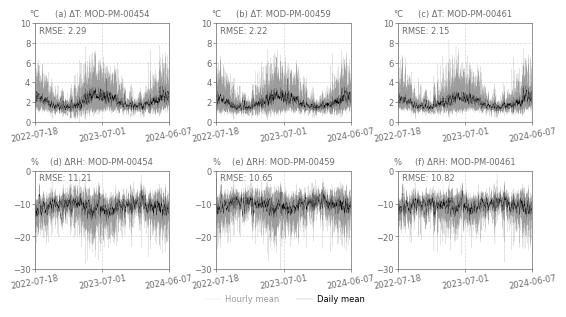

In [12]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(5.5, 3))
ax = axes.flatten()

for i, sensor in enumerate(sensor_list):
    sensor_df = pd.read_csv(sensor_datapath + sensor + '.csv')
    sensor_df['timestamp'] = pd.to_datetime(sensor_df['timestamp'])
    merged_df = pd.merge_asof(sensor_df.sort_values('timestamp'), 
                              supersite_data[['timestamp', 'TBOT', 'RH']].sort_values('timestamp'), 
                              on='timestamp', 
                              direction='nearest', 
                              tolerance=pd.Timedelta('1H'))
    merged_df['diff_tem'] = merged_df['temp_hourly_avg'] - merged_df['TBOT']
    merged_df['diff_rh'] = merged_df['rh_hourly_avg'] - merged_df['RH']  
    merged_df['diff_tem_day'] = (merged_df['temp_hourly_avg'] - merged_df['TBOT']).rolling(window=24, min_periods=1).mean()
    merged_df['diff_rh_day'] = (merged_df['rh_hourly_avg'] - merged_df['RH']).rolling(window=24, min_periods=1).mean()  
    
    ax[i].plot(merged_df['timestamp'], merged_df['diff_tem'], linewidth = linewidth, color = lc_list[0], label = 'Hourly mean')
    ax[i+3].plot(merged_df['timestamp'], merged_df['diff_rh'], linewidth = linewidth, color = lc_list[0])
    ax[i].plot(merged_df['timestamp'], merged_df['diff_tem_day'], linewidth = linewidth, color = lc_list[1], label = 'Daily mean')
    ax[i+3].plot(merged_df['timestamp'], merged_df['diff_rh_day'], linewidth = linewidth, color = lc_list[1])    
    ax[i].set_title(order_list1[i]+ 'ΔT: ' + sensor, fontsize = fontsize, color = labelcolor, pad = padding)
    ax[i+3].set_title(order_list2[i] + 'ΔRH: ' + sensor, fontsize = fontsize, color = labelcolor, pad = padding)
    ax[i].set_ylim(0, 10)
    ax[i+3].set_ylim(-30, 0)
    rmse_tem = np.sqrt(np.mean(merged_df['diff_tem'] ** 2))
    rmse_rh = np.sqrt(np.mean(merged_df['diff_rh'] ** 2))
    ax[i].text(0.03, 0.9, f"RMSE: {rmse_tem:.2f}", fontsize = fontsize, color = labelcolor, transform=ax[i].transAxes)
    ax[i+3].text(0.03, 0.9, f"RMSE: {rmse_rh:.2f}", fontsize = fontsize, color = labelcolor, transform=ax[i+3].transAxes)
     
    for j in range(2):  
        ax[i + j * 3].set_ylabel(unit_list[j], labelpad=5, rotation=0, ha='center', fontsize=labelsize,color=labelcolor)
        ax[i + j * 3].yaxis.set_label_coords(0, 1.05) 
        ax[i + j * 3].set_xticks([merged_df['timestamp'].iloc[0], pd.Timestamp('2023-07-01 00:00:00'), merged_df['timestamp'].iloc[-1]])
        ax[i + j * 3].tick_params(axis='both', labelsize=labelsize, length=2, pad =0.1, width = boundarywidth)
        ax[i + j * 3].tick_params(axis='y', which='both', left=True, right=False, labelleft=True, color=labelcolor, labelcolor=labelcolor, labelsize=fontsize, pad=pad, width=xwidth, length=length/2)
        ax[i + j * 3].tick_params(axis='x', which='both', left=True, right=False, labelleft=True, color=labelcolor, 
                                  labelcolor=labelcolor, labelsize=fontsize, pad=pad, width=xwidth, length=length/2, rotation=10)
        ax[i + j * 3].set_xlim(merged_df['timestamp'].iloc[0], merged_df['timestamp'].iloc[-1])
        ax[i + j * 3].grid(True, which='both', axis='both',linestyle='--',linewidth=0.5, alpha=0.5)
        for spine in ax[i + j * 3].spines.values():
            spine.set_linewidth(boundarywidth)
            spine.set_edgecolor(labelcolor)

line, label = ax[0].get_legend_handles_labels()  
legend = fig.legend(line, label, bbox_to_anchor=(0.5, -0.02), loc='lower center', frameon=False, handletextpad=handletextpad, fontsize=fontsize, ncol=2)
for m, text in enumerate(legend.get_texts()):
        text.set_color(lc_list[m])

plt.subplots_adjust(left=0.045, right=0.95, bottom=0.12, top=0.94, wspace=0.35, hspace= 0.5)  
fig.savefig('difference.png', dpi=300)   